# CLUSTERING
</br>
Dataset ini memuat data customer yang melakukan kredit. Analisa ini bertujuan untuk melakukan clustering terkait customer segmentation yang nantinya akan mengelompokkan customer berdasarkan variabel-variabel yang ada. Pada analisa ini akan dilakukan tiga metode clustering, yaitu K-Means, Hierarchical, dan DBSCAN.

# Data Understanding

## Import Package

In [479]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [496]:
data = pd.read_csv('german_credit_data.csv')

In [481]:
data

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
...,...,...,...,...,...,...,...,...,...,...
995,995,31,female,1,own,little,NaN,1736,12,furniture/equipment
996,996,40,male,3,own,little,little,3857,30,car
997,997,38,male,2,own,little,NaN,804,12,radio/TV
998,998,23,male,2,free,little,little,1845,45,radio/TV


In [482]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


## Check Missing Value
Melihat apakah dari masing-masing variabel terdapat missing value

In [483]:
count_missing = data.isnull().sum().sort_values(ascending = False)
print(count_missing)
percentage_missing = round(data.isnull().sum()/len(data)*100,2).sort_values(ascending=False)
print(percentage_missing)

Checking account    394
Saving accounts     183
Purpose               0
Duration              0
Credit amount         0
Housing               0
Job                   0
Sex                   0
Age                   0
Unnamed: 0            0
dtype: int64
Checking account    39.4
Saving accounts     18.3
Purpose              0.0
Duration             0.0
Credit amount        0.0
Housing              0.0
Job                  0.0
Sex                  0.0
Age                  0.0
Unnamed: 0           0.0
dtype: float64


## Fill the missing value
Mengisi nilai yang memiliki missing value dengan menggunakan modus karena variabel tersebut adalah variabel kategorik

In [497]:
data['Checking account'] = data['Checking account'].fillna(data['Checking account'].mode().values[0])

data['Saving accounts'] = data['Saving accounts'].fillna(data['Saving accounts'].mode().values[0])

In [498]:
count_missing = data.isnull().sum().sort_values(ascending = False)
print(count_missing)

Purpose             0
Duration            0
Credit amount       0
Checking account    0
Saving accounts     0
Housing             0
Job                 0
Sex                 0
Age                 0
Unnamed: 0          0
dtype: int64


## View Correlation with heatmap
Untuk melihat besarnya korelasi antar variabel

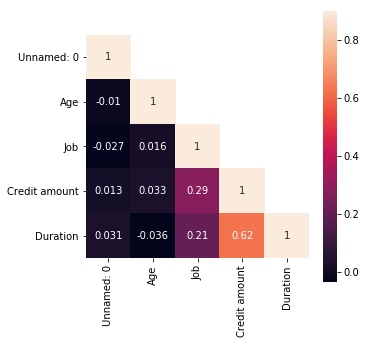

In [486]:
corr = data.corr(method = 'pearson')
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(5,5)
sns.heatmap(corr, mask = mask, vmax = 0.9, square = True, annot = True)

## Histogram Plot
Pada histogram ini ditunjukkan bahwa yang paling banyak jumlahnya adalah orang yang memiliki durasi kredit paling lama

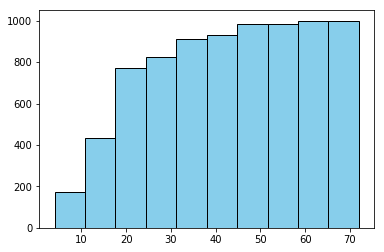

In [487]:
plt.hist(data['Duration'], 
         facecolor='skyblue', 
         edgecolor='black', 
         cumulative=True)
plt.show()

## Initialize Variable Numerical and Categorical

In [488]:
kategorik = ['Sex', 'Job', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']
numeric = ['Age', 'Credit amount', 'Duration']

## Check Outlier from Numerical Variable with Box Plot

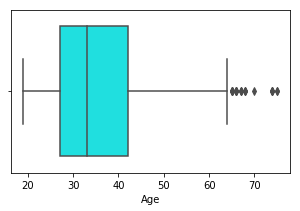

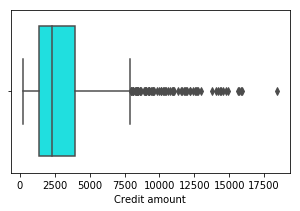

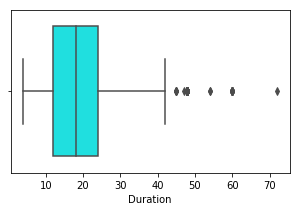

In [489]:
def univariate_analysis(data, features):
    for index, feature in enumerate(features):
        fig = plt.figure(figsize=(5,3))
        fig1 = sns.boxplot(data = data, x = feature, color = 'cyan',orient = "h")
univariate_analysis(data,numeric)

## Check composition from Categorical Variable with Count Plot

Dari count plot dibawah ini dapat disimpulkan bahwa :
1. Orang dengan jenis kelamin laki-laki lebih banyak melakukan kredit dibanding wanita
2. Orang dengan pekerjaan nomor 2 lebih banyak melakukan kredit dibandingkan job lainnya
3. Orang yang memiliki rumah sendiri lebih banyak melakukan kredit
4. Orang yang memiliki saving account sedikit lebih banyak melakukan kredit
5. Orang yang memiliki checking account sedikit lebih banyak melakukan kredit
5. Orang yang melakukan kredit lebih banyak digunakan untuk pembelian mobil, selanjutnya diikuti dengan pembelian radio/TV

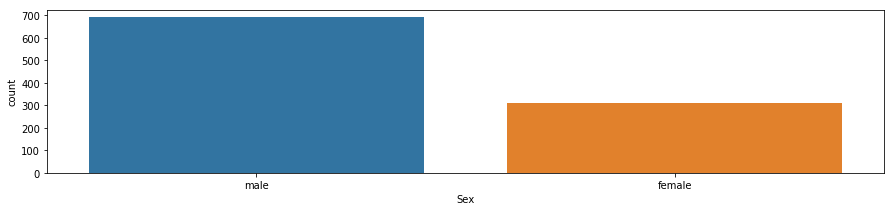

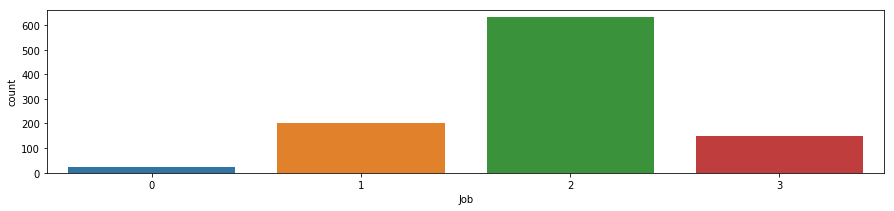

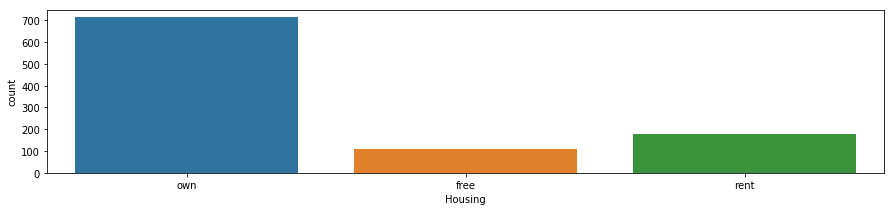

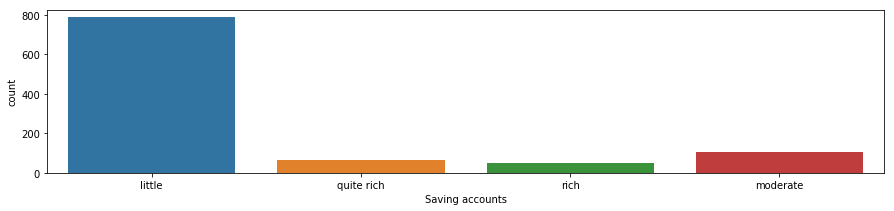

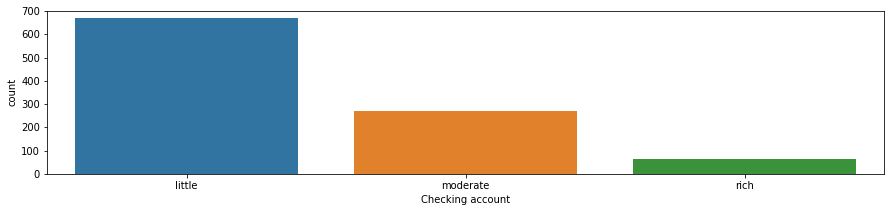

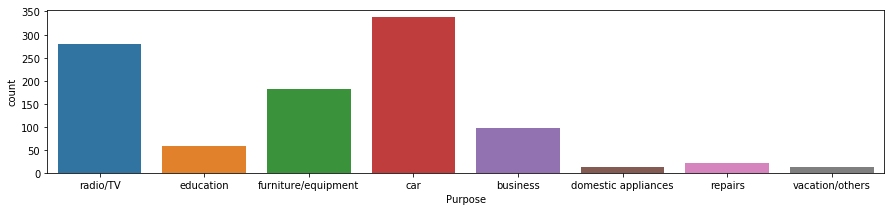

In [490]:
def univariate_analysis(data, features):
    for index, feature in enumerate(features):
        fig = plt.figure(figsize=(15,3))
        fig1 = sns.countplot(data = data, x = feature)
univariate_analysis(data,kategorik)

## Check correlation between Numerical variable with Reg Plot

In [491]:
numeric.remove('Credit amount')

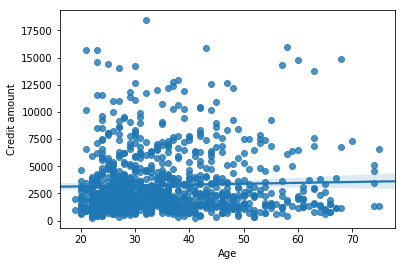

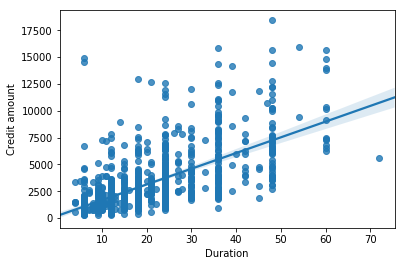

In [492]:
def regplot(data, features, target):
    for index, feature in enumerate(features):
        sns.regplot(x = feature, y = target, data = data)
        plt.show()
regplot(data, numeric, 'Credit amount')

## Check correlation between Credit amount and Duration with Bar Plot

Dari Bar Plot dibawah ini dapat diketahui bahwa semakin sedikit jumlah kredit yang diajukan, maka semakin sebentar durasi pengembalian dana yang di kredit

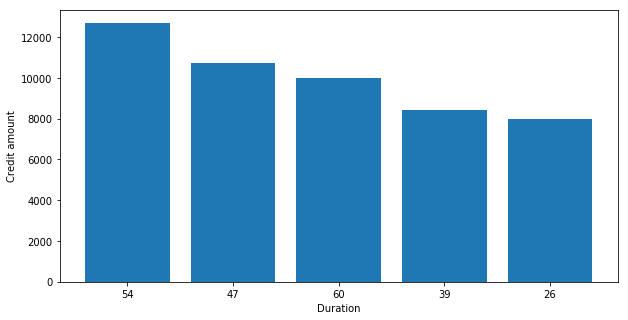

In [493]:
cad = data[["Credit amount","Duration"]]
cads = cad.groupby("Duration").mean().sort_values('Credit amount', ascending = False).head()
cads

plt.figure(figsize=(10,5))

x= range(5)
plt.bar(x,cads['Credit amount'])
plt.xticks(x,cads.index)
plt.xlabel('Duration')
plt.ylabel('Credit amount')
plt.show()

## Check composition from variabel Age with Count Plot

Pada count plot dibawah ini dapat diketahui bahwa yang paling banyak melakukan kredit adalah orang dewasa dan yang paling sedikit melakukan kredit adalah orang tua

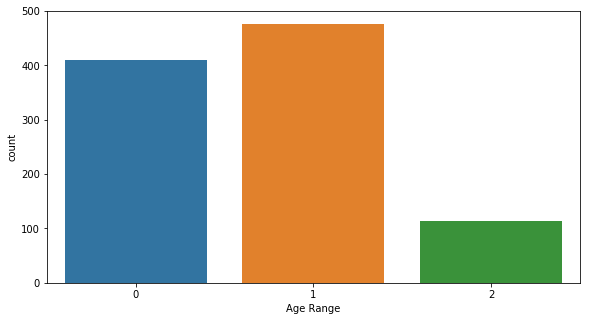

In [494]:
agerange = [19, 30, 50, np.inf]
agename = ['0', '1', '2']
data['Age Range'] = pd.cut(data['Age'], agerange, labels=agename)
f = plt.figure(figsize=(21,5))
f.add_subplot(1,2,1)
sns.countplot(data['Age Range'])

plt.show()

## Choose the variable to find cluster 

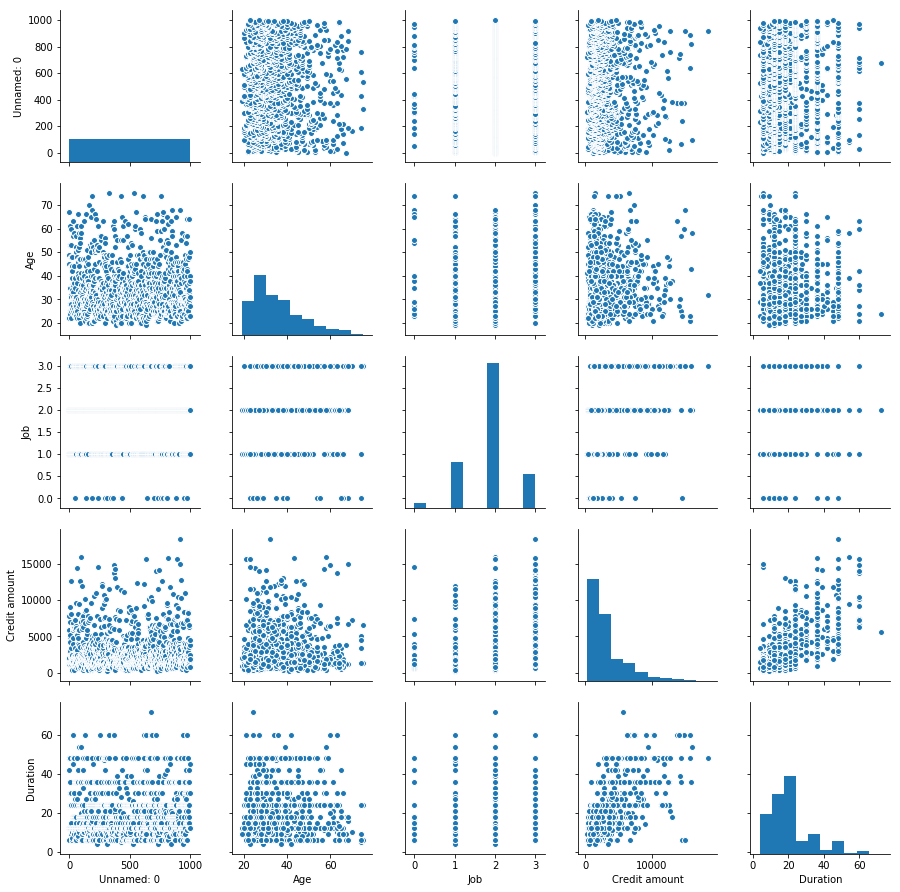

In [499]:
sns.pairplot(data)

In [500]:
data = data[['Age','Credit amount', 'Duration']]
data.head()

,Age,Credit amount,Duration
0,67,1169,6
1,22,5951,48
2,49,2096,12
3,45,7882,42
4,53,4870,24


In [501]:
data.corr()

,Age,Credit amount,Duration
Age,1.000000,0.032716,-0.036136
Credit amount,0.032716,1.000000,0.624984
Duration,-0.036136,0.624984,1.000000


In [502]:
X = np.asarray(data)

## View data with scatterplot

Hal ini digunakan untuk dapat melihat karakteristik dari data.

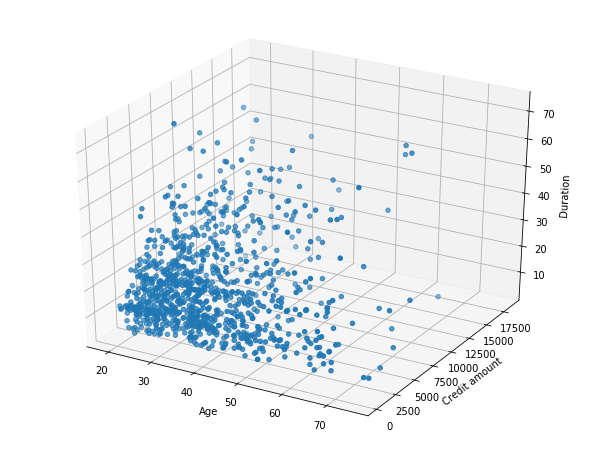

In [503]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

# K-MEANS

In [504]:
from sklearn.cluster import KMeans

## Find the best K

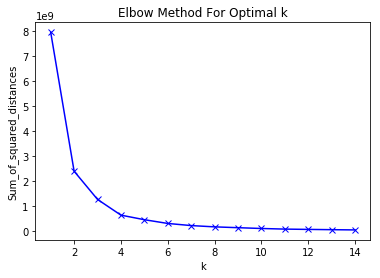

In [505]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Berdasarkan elbow method diatas dan silhouette dibawah ini dapat diketahui bahwa K yang terbaik adalah 3

In [506]:
range_n_clusters = [3, 4, 5]
for n_cluster in range_n_clusters:
    kmeans = KMeans(n_clusters = n_cluster, max_iter =1000)
    kmeans.fit(X)
    labels = kmeans.predict(X)
    from sklearn.metrics import silhouette_score
    silhouette_avg = silhouette_score(X, labels)
    print(silhouette_avg)

0.6478684818948528
0.6118749333823521
0.5822732280015671


## Activation K-Means 

In [507]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

## Print centroid value

In [508]:
print(kmeans.cluster_centers_)

[[   35.33562586  1887.43878955    16.72077029]
 [   36.05357143 11695.58928571    39.66071429]
 [   36.11981567  5733.35023041    30.07373272]]


In [509]:
print(kmeans.labels_)

[0 2 0 2 2 1 0 2 0 2 0 2 0 0 0 0 0 2 1 0 0 0 0 0 0 0 0 0 0 2 0 2 2 0 0 2 2
 0 0 0 0 0 2 2 2 0 0 0 2 0 0 2 0 0 0 0 2 1 0 2 0 0 0 1 0 2 0 0 0 0 2 0 0 2
 0 0 2 2 1 2 2 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 1 2 2 2 0 0
 0 2 2 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 0 2 2 0 0 1 0 2 0 0 0 0 2 0 0 0 0 0 0
 2 0 0 0 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 2 0 0 0 0 0 0 2 0 0 0 0 1 2 0 0 0
 0 2 0 0 0 2 2 2 0 0 0 0 0 0 2 0 0 2 0 0 1 0 0 2 0 0 2 2 0 0 0 0 2 0 0 0 0
 0 0 2 0 1 2 0 0 2 0 0 0 0 0 1 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 2 0 2 0 0 2
 0 0 0 2 0 0 0 2 0 1 0 0 0 1 0 1 0 0 0 2 0 0 0 0 0 2 1 2 2 0 0 0 1 2 2 2 1
 2 0 0 0 0 0 0 0 1 0 2 0 0 0 2 2 0 0 0 0 0 2 0 0 2 0 0 0 0 0 2 0 2 0 2 0 2
 1 2 0 0 0 2 0 2 0 0 2 2 0 0 0 0 0 0 0 0 2 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0
 0 2 0 1 1 2 0 0 1 0 0 1 0 0 2 0 0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 2 0 0 0 2 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 2 0 0 0 0 0 1 0 0 0 2 0 2 0 0 2 0 0 0 0 0 0 0 2 0 2 0 0 0 0 0 0 0 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 2 0 

## Visualization of centroid

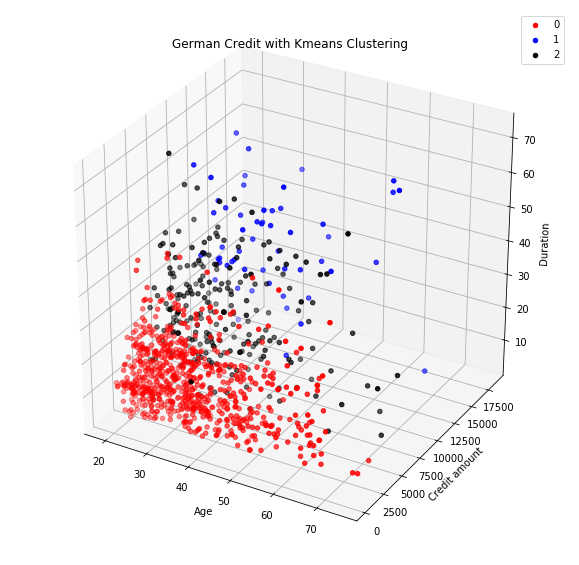

In [510]:
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= kmeans.labels_
color = ['red','blue','black']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(kmeans.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
    ax.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],kmeans.cluster_centers_[:,2],color='black')
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Kmeans Clustering")
plt.show()

## Input the result value into variable

In [511]:
data_clustered = pd.DataFrame(X)
data_clustered['cluster'] = pd.DataFrame(kmeans.labels_)
data_clustered = data_clustered.sort_values('cluster')
data_clustered = np.asarray(data_clustered)

## Create similarity matrix

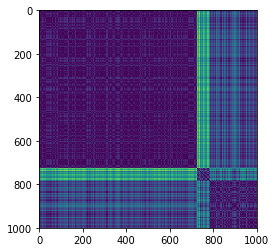

In [512]:
from scipy.spatial.distance import cdist
dist = cdist(data_clustered[:,0:2],data_clustered[:,0:2], metric='euclidean')
plt.imshow(dist)
plt.show()

# RESULT K-MEANS

#### Dari hasil analisa dengan menggunakan metode K-Means dapat diketahui bahwa terdapat 3 cluster yang terbentuk berdasarkan karakteristik variable yang berbeda-beda, yaitu :
<br>
**Cluster 0 **
Memiliki credit amount sedikit, durasi kredit cepat, dan berada pada range umur 20-50<br>
               Centroid = age : 35, credit amount :  1957, duration : 17
<br>
**Cluster 1** : Memiliki credit amount rata-rata (pertengahan), memiliki durasi kredit lama, dan berada pada range umur 20-40<br>
               Centroid = age : 36, credit amount :  5997, duration : 31
<br>
**Cluster 2 **: Memiliki credit amount dengan range rata-rata sampai tinggi, memiliki durasi kredit lama, dan berada pada range umur 30-40<br>
               Centroid = age : 36, credit amount :  11747, duration : 40

# Hierarchical Cluster

In [516]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

## Create Dedogram with Ward method

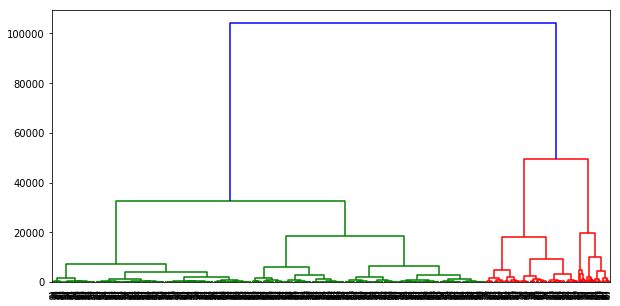

In [517]:
plt.figure(figsize=(10,5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

## Fitting hierarchical clustering

In [518]:
model = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

## Plot the data after hierarchical clustering

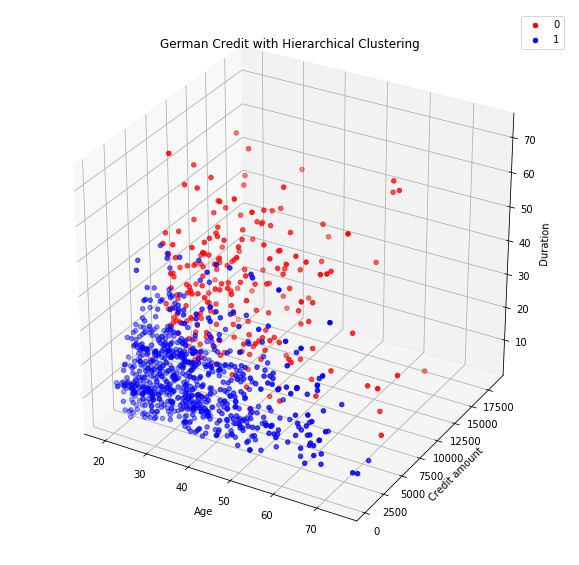

In [519]:
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= model.labels_
color = ['red','blue','black']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(model.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with Hierarchical Clustering")
plt.show()

# RESULT OF HIERARCHICAL

Dari hasil analisa dengan menggunakan metode Hierarchical dapat diketahui bahwa terdapat 2 cluster yang terbentuk berdasarkan karakteristik variable yang berbeda-beda, yaitu :
<br>
Cluster 0 : Memiliki credit amount sedikit, durasi kredit cepat, dan berada pada range umur 20-60
<br>              
Cluster 1 : Memiliki credit amount tinggi, memiliki durasi kredit lama, dan berada pada range umur 20-40
   

# DBSCAN

In [351]:
from sklearn.cluster import DBSCAN
from sklearn import datasets

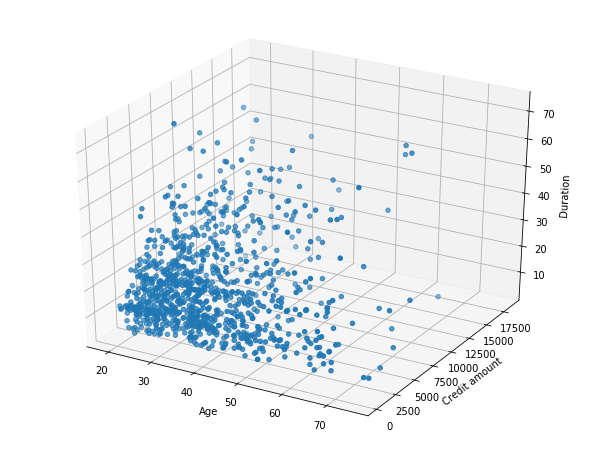

In [357]:
fig = plt.figure(1, figsize=(8,6))
plt.clf()

ax=Axes3D(fig)
plt.cla()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")

ax.scatter(X[:,0],X[:,1],X[:,2], label = 'True Position')

In [388]:
dbscan = DBSCAN(eps=150, min_samples=10)
dbscan.fit(X)

DBSCAN(algorithm='auto', eps=150, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=10, n_jobs=None, p=None)

## Print the result of DBSCAN

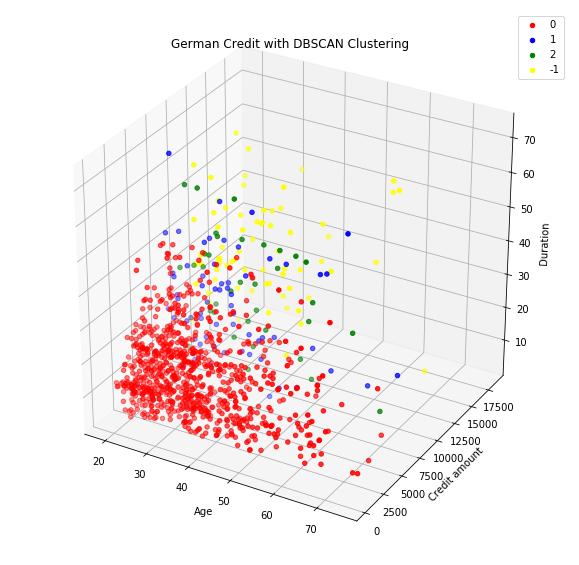

In [456]:
x = X[:,0]
x1 = X[:,1]
x2 = X[:,2]
group= dbscan.labels_
color = ['red','blue','green','yellow']
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for g in set(dbscan.labels_):
    xa = [x[j] for j in range(len(x)) if group[j]==g]
    xb = [x1[j] for j in range(len(x1)) if group[j]==g]
    xc = [x2[j] for j in range(len(x1)) if group[j]==g]
    ax.scatter(xa,xb,xc, c=color[g], label=g)
ax.legend()
ax.set_xlabel("Age")
ax.set_ylabel("Credit amount")
ax.set_zlabel("Duration")
plt.title("German Credit with DBSCAN Clustering")
plt.show()

# RESULT OF DBSCAN

#### Dari hasil analisa dengan menggunakan metode DBSCAN dapat diketahui bahwa terdapat 3 cluster yang terbentuk berdasarkan karakteristik variable yang berbeda-beda, yaitu :
</br>
#### Cluster 0 : Memiliki credit amount sedikit, durasi kredit cepat, dan berada pada range umur 20-60
     
#### Cluster 1 : Memiliki credit amount dengan range rata-rata sampai tinggi, memiliki durasi kredit cepat, dan berada pada range umur 20-40
             
#### Cluster 2 : Memiliki credit amount  tinggi, memiliki durasi kredit cepat, dan berada pada range umur 30-40
</br>
Selain itu dengan menggunakan metode DBSCAN dapat diketahui bahwa terdapat banyak data noise.

# SUMMARY

In [546]:
data['K-Means'] =  pd.DataFrame(kmeans.labels_)
data['Hierarchical'] = pd.DataFrame(model.labels_)
data['DBSCAN'] = pd.DataFrame(dbscan.labels_)
data.head(20)

,Age,Credit amount,Duration,K-Means,Hierarchical,DBSCAN
0,67,1169,6,0,1,0
1,22,5951,48,2,0,1
2,49,2096,12,0,1,0
3,45,7882,42,2,0,2
4,53,4870,24,2,0,0
5,35,9055,36,1,0,-1
6,53,2835,24,0,1,0
7,35,6948,36,2,0,1
8,61,3059,12,0,1,0
9,28,5234,30,2,0,0


Menurut saya metode clustering yang paling baik untuk dataset ini adalah K-Means. Hal ini dikarenakan pada K-Means terdapat nilai K yang paling baik untuk dijadikan jumlah cluster. Pada metode K-Means terdapat cluster yang dapat terbentuk dan cluster tersebut memiliki tingkat homogen yang baik. Jika dibandingkan dengan metode Hierarchical,hanya terdapat 2 cluster jadi segmentasi customernya masih terlalu luas. Selain itu, jika pada metode DBSCAN masih banyak nilai noise yang dihasilkan dan menjadikan metode tersebut tidak baik untuk dataset ini. Pada metode K-Means terdepat 3 cluster yang terbentuk, yaitu : 
<br>
Cluster 0 : Memiliki credit amount sedikit, durasi kredit cepat, dan berada pada range umur 20-50
<br>
Cluster 1 : Memiliki credit amount rata-rata (pertengahan), memiliki durasi kredit lama, dan berada pada range umur 20-40
<br>
Cluster 2 : Memiliki credit amount dengan range rata-rata sampai tinggi, memiliki durasi kredit lama, dan berada pada range umur 30-40

Setelah mengetahui segmentasi dari customer kita dapat memberikan beberapa treatment agar customer tersebut dapat meningkat kualitasnya dan tidak berpindah kelain perusahaan. Saran treatmentnya adalah :
<br>
Untuk cluster 0 : diberikan promosi, jika customer meminjam dengan jumlah yang besar, makan customer akan mendapatkan diskon pada beberapa merchant yang bekerja sama.
<br>
Untuk cluster 1 : diberikan promosi, jika customer memiliki durasi kredit lebih cepat, maka akan mendapatkan reward berupa bunganya akan lebih rendah misal dari 2% menjadi 1.8%. 
<br>
Untuk cluster 2 : diberikan treatment seperti mendapatkan diskon merchant bulanan. Selain itu, apabila customer memiliki durasi kredit lebih cepat maka akan diberikan cashback berupa diskon 0.5% untuk bunga perbulan
<br>
<br>
Pada setiap cluster perlu dilakukan AB Testing untuk dapat mengetahui mereka lebih suka mengetahui info atau promo melaluui media komunikasi apa. Semisal customer akan lebih tertarik dengan menggunakan SMS, dengan begitu perusahaan akan dapat menjangkau customer untuk memberikan informasi melalui SMS dan diberitahukan mengenai treatment yang tadi telah disarankan untuk masing-masing cluster.
<br>
<br>
Selain itu untuk melihat resiko pemberian kredit dapat disegmentasikan sebagai berikut :<br>
Cluster 0 : Low Risk<br>
Cluster 1 : Medium Risk<br>
Cluster 2 : High Risk

In [547]:
data=data.replace({0:'Low Risk', 1: 'Medium Risk', 2:'High Risk'})

In [550]:
result = pd.DataFrame(data['K-Means'].value_counts())

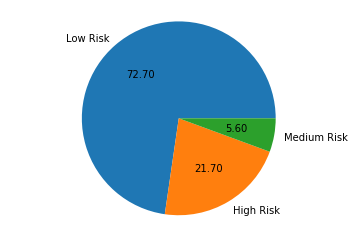

In [552]:
pie = (0.1, 0.1, 0.2)
plt.pie(result['K-Means'],labels = result.index, autopct = '%.2f')
plt.axis('equal')
plt.show()

Dari pie chart diatas dapat dilihat komposisi resiko dari masing-masing tingkat dengan menggunakan metode K-Means